In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of differential equations (for the vector field)
def system(x, y):
    dx_dt = x*(3*x + 4*y -3)
    dy_dt = y*(3*x + 4*y - 4)
    return dx_dt, dy_dt

In [2]:
plt.rcParams.update({
    'font.size': 12,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 10,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.autolayout': True,
    'axes.linewidth': 1.0,
    'lines.linewidth': 1.5
})

In [13]:
#grid for the vector field
x = np.linspace(0, 1, 1000)  # Reduced resolution for less density
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

# Plot the semicircle boundary
#theta = np.linspace(0, np.pi, 100)
#x_circle = np.cos(theta)
#y_circle = np.sin(theta)
# Iterate over lambda values and subplots
# Here Iteration is not done, just to plot scaling solution manually.

/tmp/ipykernel_25601/405921734.py:19: UserWarning: The following kwargs were not used by contour: 'hatch'
  plt.contourf(X,Y,accln_reg, levels = [0.5,1.5], colors='gold', alpha=0.6, hatch='\\\\')


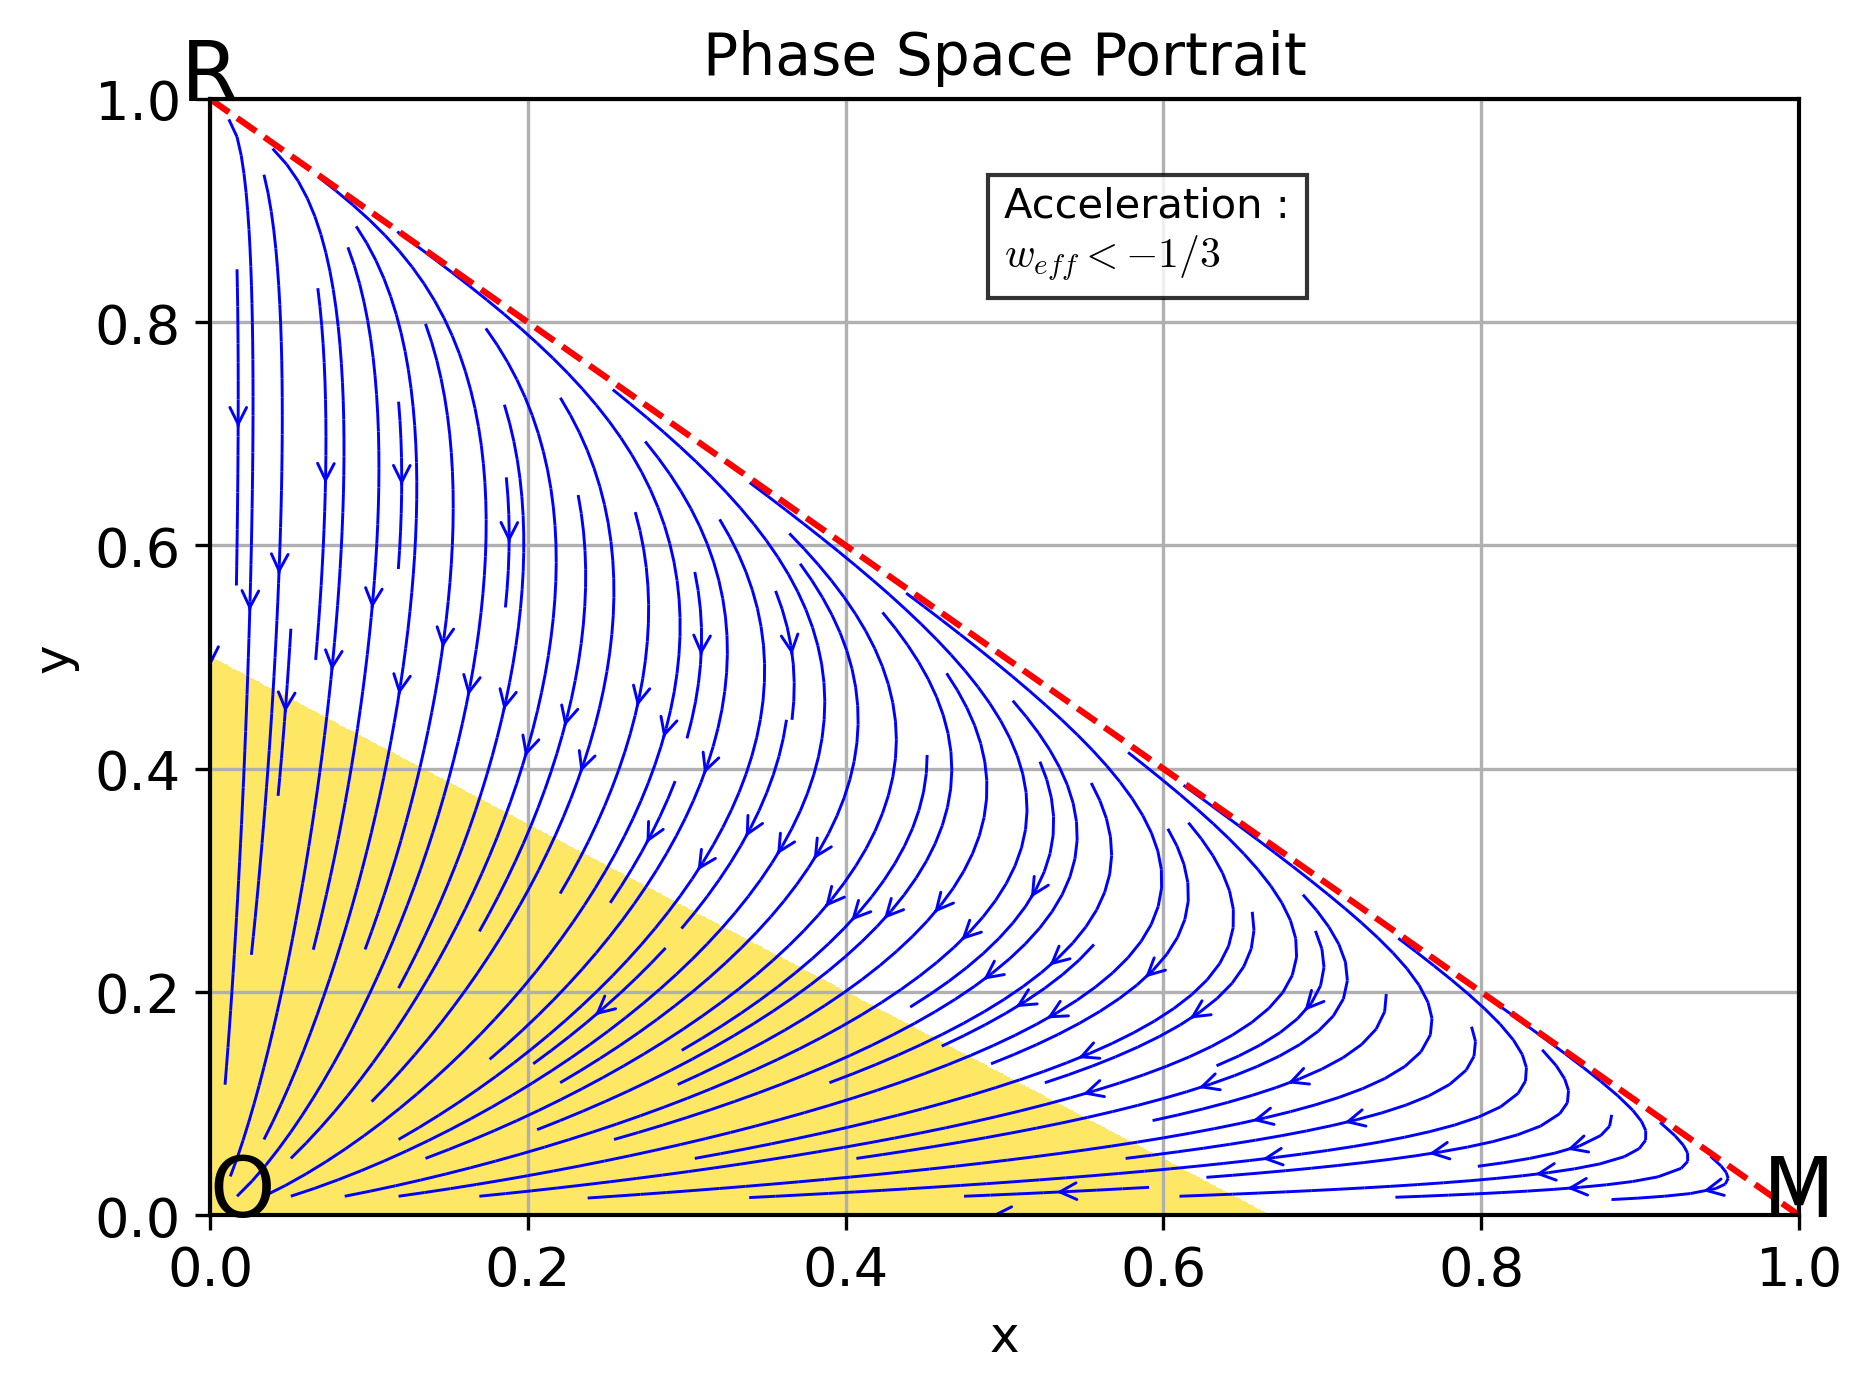

In [22]:
x_c = 0
y_c = 0
    # Compute the vector field
U, V = system(X, Y)

    # Mask points outside the semicircle
mask = X + Y <= 1
U = np.where(mask, U, np.nan)
V = np.where(mask, V, np.nan)

    # Plot the streamlines with direction vectors
plt.streamplot(X, Y, U, V, density=2, color='b', linewidth=0.7, arrowsize=1, arrowstyle='->')
# Plot the critical point D
#plt.plot(x_c, y_c, 'ro', label=f'Point D ({x_c:.2f}, {y_c:.2f})')
#plt.text(0.18,0.87, 'C', fontsize=20)
    
w_eff = -1 + X + 4*Y/3
accln_reg = (w_eff < -1/3) & (X>0) & (Y>0) & (X + Y <= 1)
plt.contourf(X,Y,accln_reg, levels = [0.5,1.5], colors='gold', alpha=0.6, hatch='\\\\')
plt.text(0.5, 0.85,'Acceleration :\n$w_{{eff}}<-1/3$',
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.plot((0,1),(1,0),"--",color='red')
# Set labels and limits
plt.xlabel('x')
plt.ylabel('y')
plt.text(0.02,0.02,'O', size=20, ha='center', va='center')
plt.text(0,1.02,'R',size=20, ha='center', va='center')
plt.text(1,0.02,'M',size=20, ha='center', va='center')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.title('Phase Space Portrait')
plt.savefig('phase_lcdm.png')
plt.show()